# Edge Detection
*Luis Eduardo Robles Jiménez || 0224969*

*Sara Carolina Gómez Delgado || 0226594*

In [156]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Part 1

### Read image

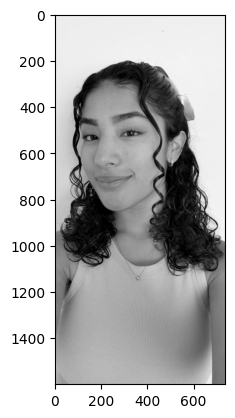

In [157]:
# img = cv2.imread("../../images/stitch.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("../../images/mickey.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("../../images/me.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.show()

### Canny Edge Detection
##### *OpenCV*

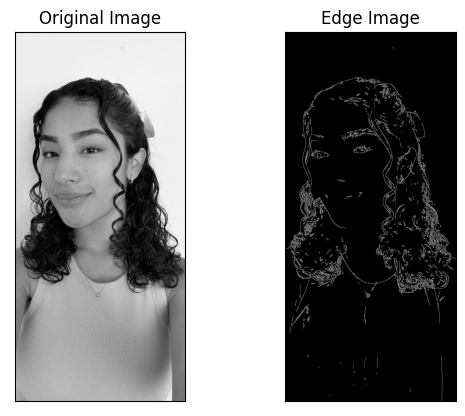

In [158]:
edges = cv2.Canny(img.copy(),100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Ours

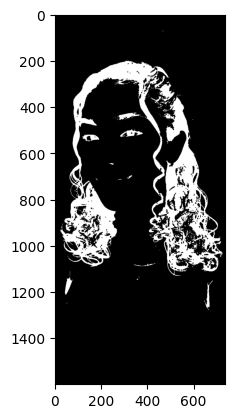

In [159]:
gray = img.copy()

# blur
blur = cv2.GaussianBlur(gray, (0,0), sigmaX=33, sigmaY=33)
divide = cv2.divide(gray, blur, scale=255)
thresh = cv2.threshold(divide, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    
# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

#write result 
plt.imshow(morph, cmap = "gray")


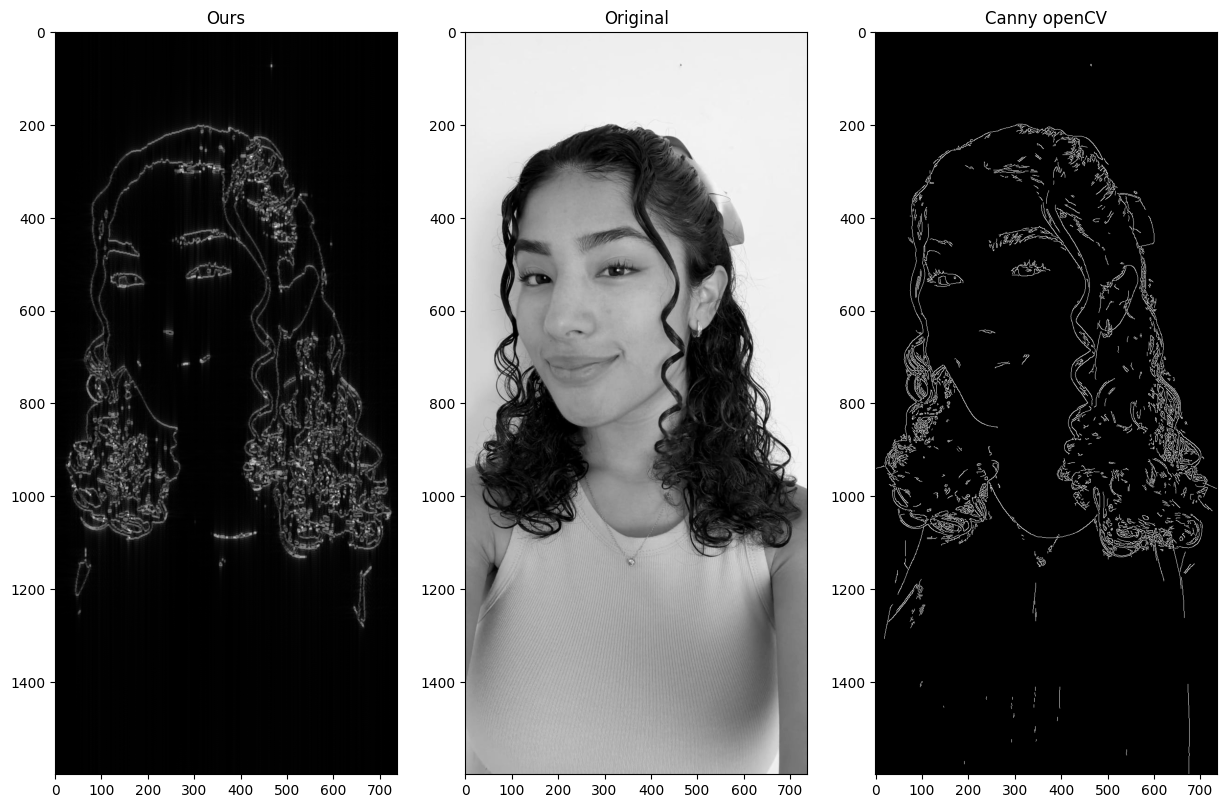

In [160]:
img_float32 = np.float32(morph)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

rows, cols = morph.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
r = 180
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 0
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_One = cv2.idft(f_ishift)
img_One = cv2.magnitude(img_One[:,:,0],img_One[:,:,1])




# open
k = np.array([[1, 1], [1, 1]])
img_One = cv2.erode(img_One, k, iterations=1)
img_One = cv2.dilate(img_One, k, iterations=2)




plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_One,cmap = 'gray');
plt.title('Ours');
plt.subplot(1,3,2);
plt.imshow(img,cmap = 'gray');
plt.title('Original');
plt.subplot(1,3,3);
plt.imshow(edges,cmap = 'gray');
plt.title('Canny openCV');


### What do you observe? What modifications would you make to your algorithm? Describe your process in detail.
 Write some text here

## Part 2